# ||||----------------California house prices-------------------------------------------||||

In [1]:
#import standard library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print('------------library imported done------------')

------------library imported done------------


In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from sklearn.datasets import fetch_california_housing

In [3]:
# Load the California housing data
california_data = fetch_california_housing(as_frame=True)
df = california_data.frame

# Convert the DataFrame to a GeoDataFrame (EPSG:4326)
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"
)

# Read the shapefile with the California coastal boundary 
# (Place the ZIP file from GitLab in the same folder as this script)
coast = gpd.read_file("Statewide_CoastalZoneBoundary_Cadastral.shp")

# Reproject both GeoDataFrames into a metric coordinate system (EPSG:3395)
gdf = gdf.to_crs(epsg=3395)
coast = coast.to_crs(epsg=3395)

# Calculate the minimum distance from each point to the coastline
gdf['dist_to_coast'] = gdf.geometry.apply(lambda point: coast.distance(point).min())

# Define urban areas: Californian cities with more than 500,000 inhabitants
# Coordinates (Longitude, Latitude) are provided in EPSG:4326
target_points = {
    "LosAngeles": (-118.2437, 34.0522),
    "SanDiego": (-117.1611, 32.7157),
    "SanJose": (-121.8863, 37.3382),
    "SanFrancisco": (-122.4194, 37.7749),
    "Fresno": (-119.7871, 36.7378),
    "Sacramento": (-121.4944, 38.5816)
}

# Calculate the distance from each point in gdf to the defined cities
for city, coords in target_points.items():
    lon, lat = coords
    # Create the target point as a GeoSeries (EPSG:4326) and reproject it to EPSG:3395
    city_point = gpd.GeoSeries([Point(lon, lat)], crs="EPSG:4326").to_crs(epsg=3395).iloc[0]
    gdf[city + "_dist"] = gdf.geometry.distance(city_point)

# Determine the minimum distance (in meters) to the urban areas
urban_distance_cols = [city + "_dist" for city in target_points.keys()]
gdf["minUrbanDist"] = gdf[urban_distance_cols].min(axis=1)

# Remove unnecessary columns (Latitude, Longitude, geometry, etc.)
columns_to_drop = ["Latitude", "Longitude", "geometry"] + urban_distance_cols
df = gdf.drop(columns=columns_to_drop)

# Check the result (Note: Distances are in meters, but the unit is not important for now)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  MedHouseVal  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556        4.526   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842        3.585   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260        3.521   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945        3.413   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467        3.422   

   dist_to_coast  minUrbanDist  
0   33308.176269  25731.358978  
1   33378.959041  25205.500499  
2   30819.652938  22580.397531  
3   29771.759793  21602.105346  
4   29771.759793  21602.105346  


In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,dist_to_coast,minUrbanDist
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526,33308.176269,25731.358978
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585,33378.959041,25205.500499
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521,30819.652938,22580.397531
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413,29771.759793,21602.105346
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422,29771.759793,21602.105346
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781,259651.697538,135898.595876
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771,250364.080243,133471.461793
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923,243939.435078,124840.632131
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847,235402.365386,122592.940938


In [5]:
print('______________print the shape $ info of data_____________________')
print('shape of house data\n',df.shape)
print('============================ Below is info ======================================')
print('info about data\n',df.info())
print('==========================Below is the datatype printed===========================')
print('check the data type\n',df.dtypes)

______________print the shape $ info of data_____________________
shape of house data
 (20640, 9)
============================ Below is info ======================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   MedHouseVal    20640 non-null  float64
 7   dist_to_coast  20640 non-null  float64
 8   minUrbanDist   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
info about data
 None
==========================Below is the datatype printed===========================
check the data type
 MedInc           float64
HouseAge         float64
AveRooms    

In [6]:
#Describe the summary of statisitis
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,dist_to_coast,minUrbanDist
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558,58939.585723,62147.058392
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956,71380.409004,69432.147019
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990,0.116352,443.630909
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000,10166.461187,18476.484981
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000,27299.381783,37372.098667
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250,80980.272937,83507.367541
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010,440211.552403,571400.080740


# Exploratory data analysis
Already i check the data null values there is no null values

In [7]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();

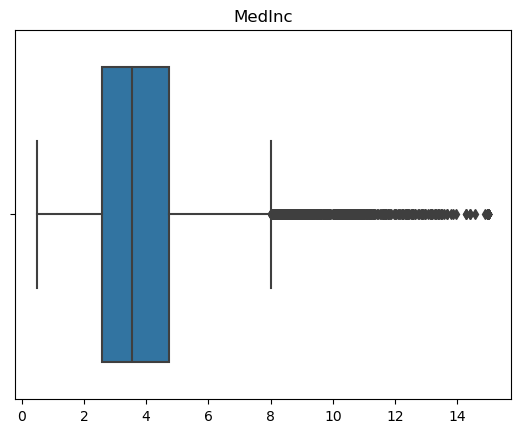

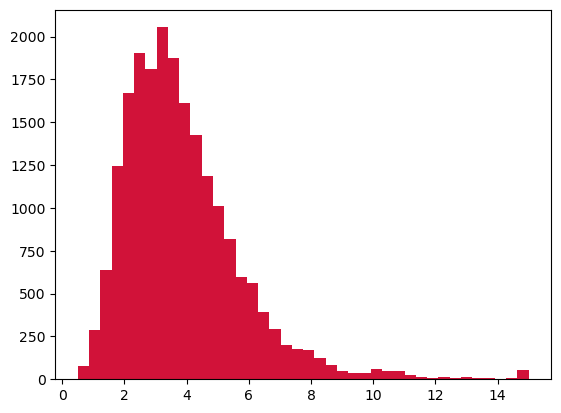

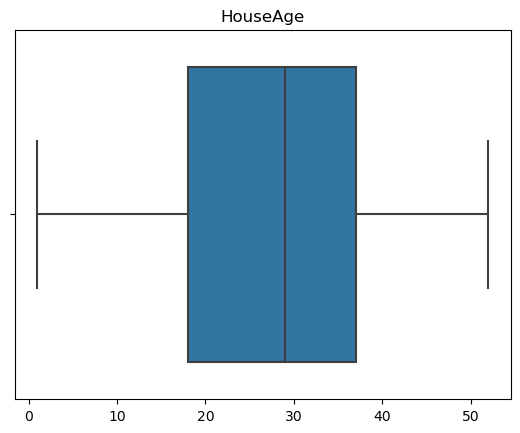

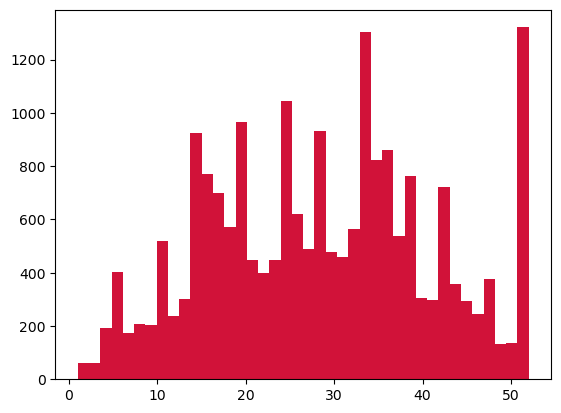

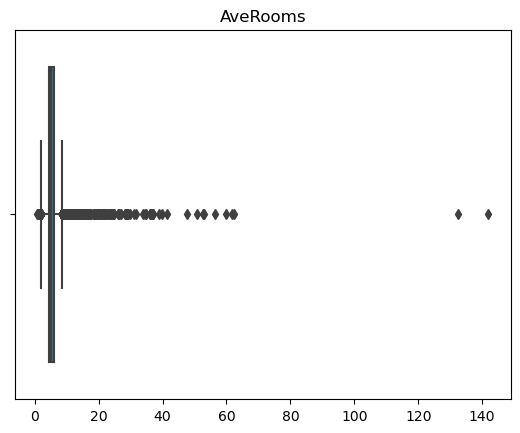

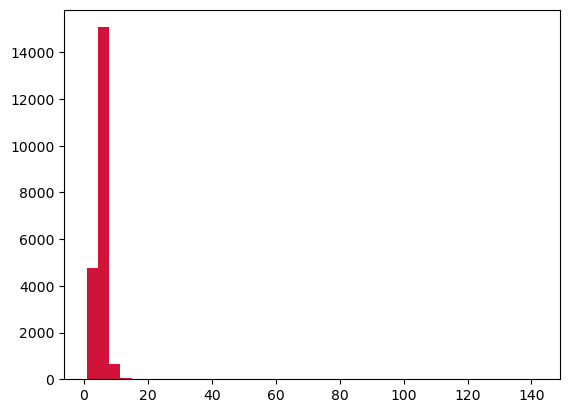

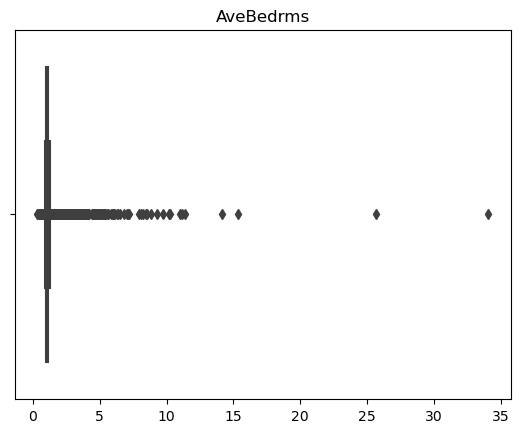

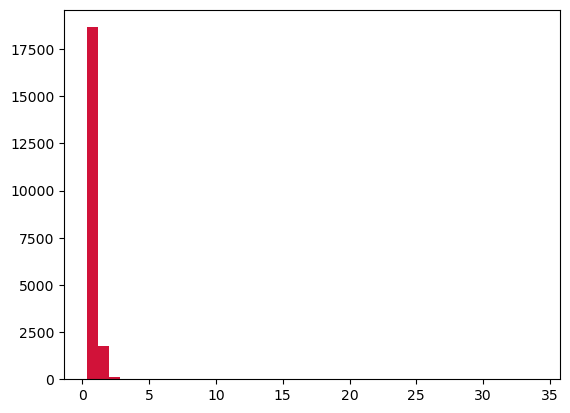

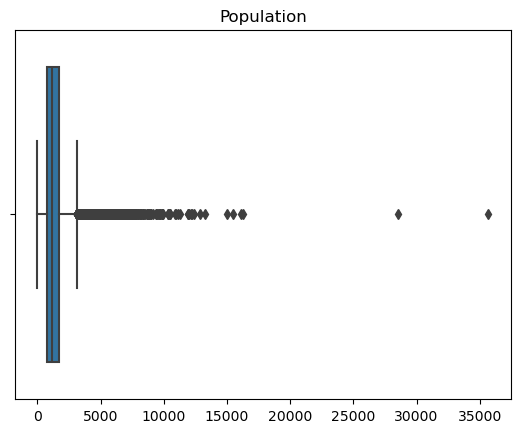

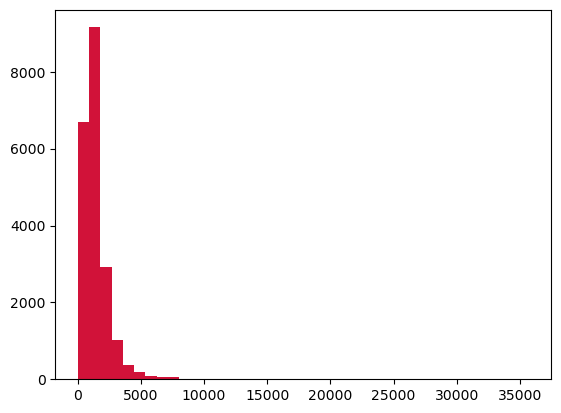

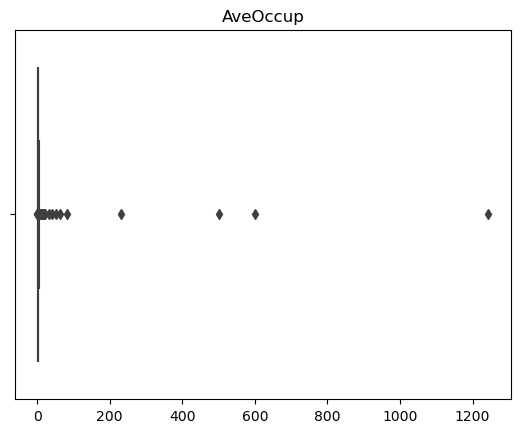

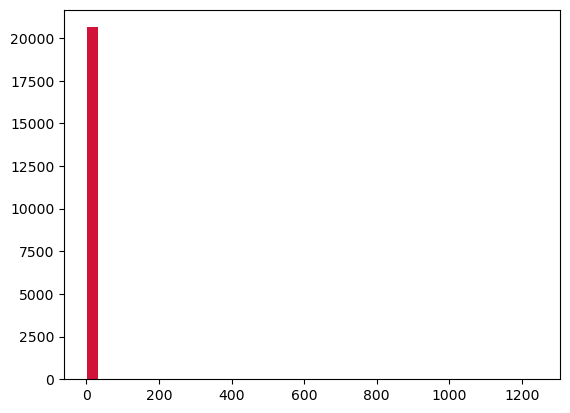

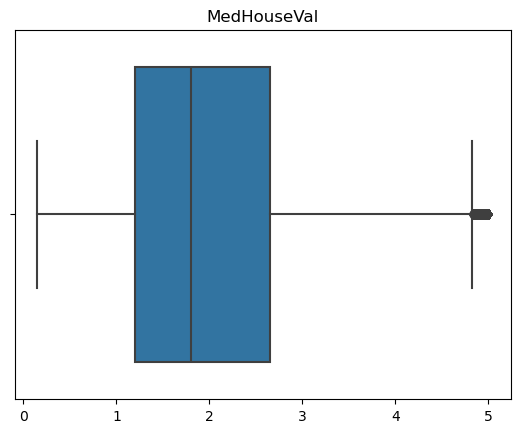

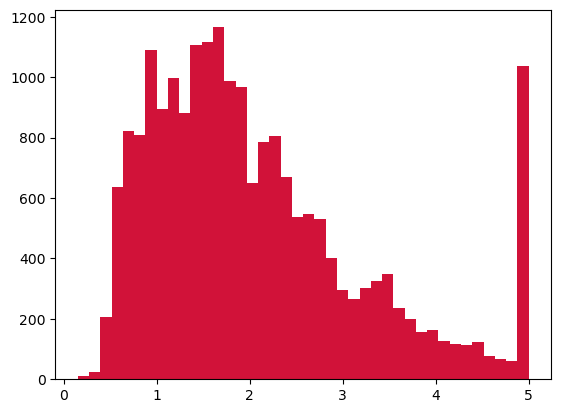

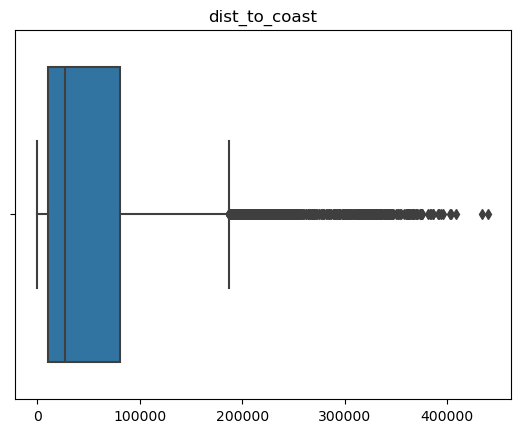

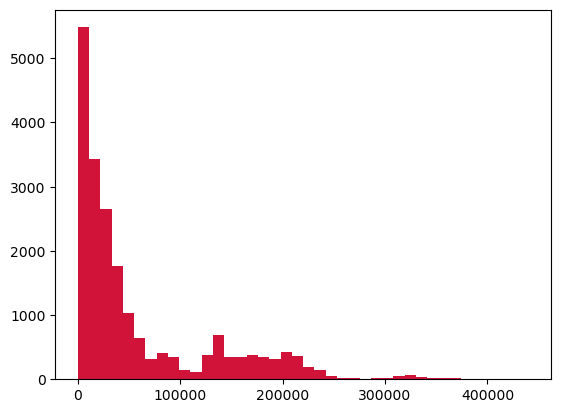

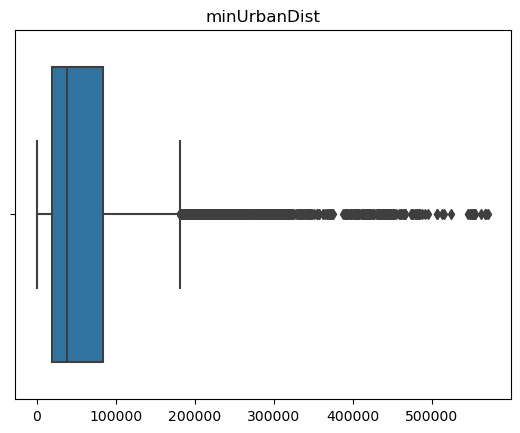

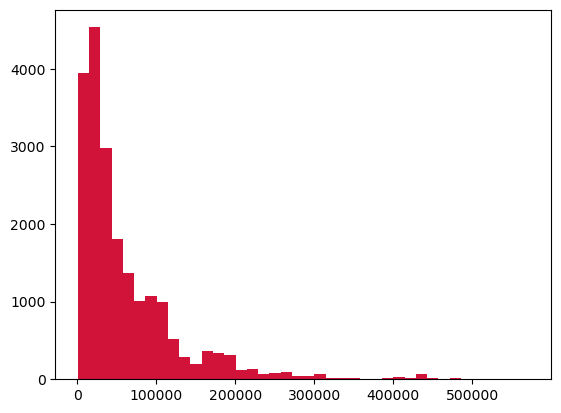

In [8]:
# loop over all the columns and draw outliers 
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

In [9]:
# show the correlation between columns 
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,dist_to_coast,minUrbanDist
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075,-0.247754,-0.160445
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623,-0.221338,-0.262685
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948,0.213013,0.167657
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701,0.207068,0.158012
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650,-0.066100,-0.048824
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737,0.014349,0.010257
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000,-0.486497,-0.299689
dist_to_coast,-0.247754,-0.221338,0.213013,0.207068,-0.066100,0.014349,-0.486497,1.000000,0.371821
minUrbanDist,-0.160445,-0.262685,0.167657,0.158012,-0.048824,0.010257,-0.299689,0.371821,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

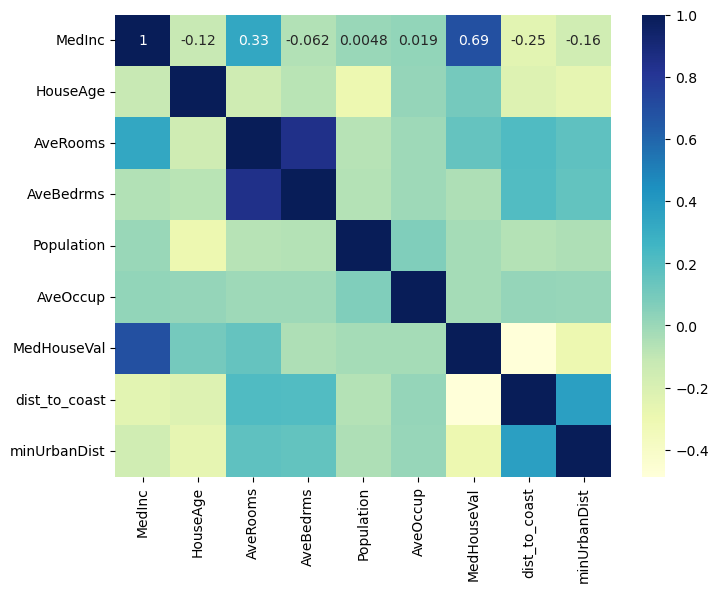

In [10]:
#visualize the correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

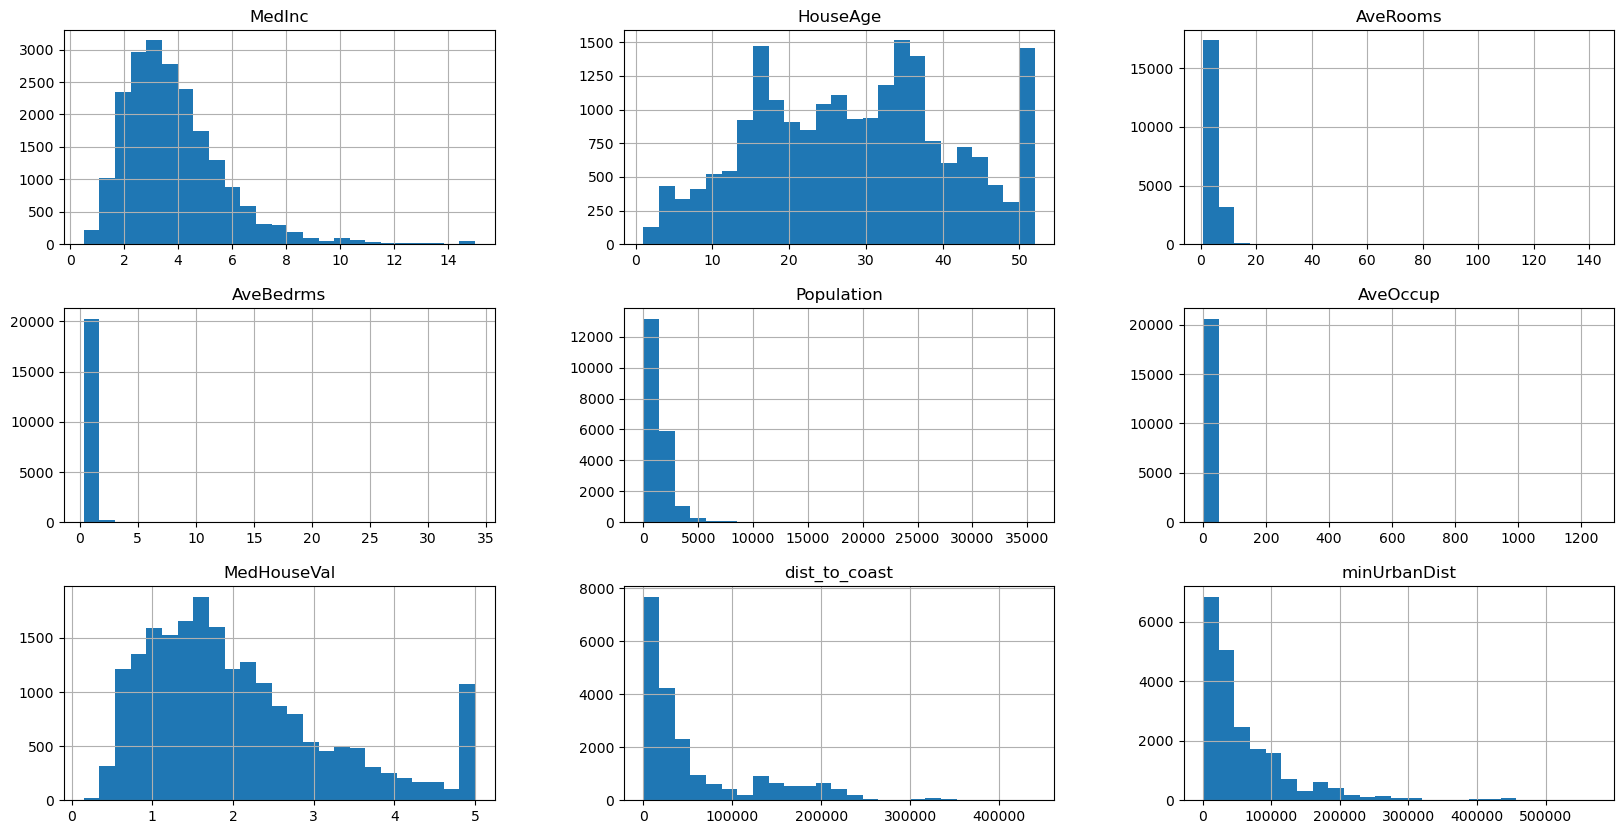

In [11]:
# Histogram
df.hist(bins=25,figsize=(20,10));

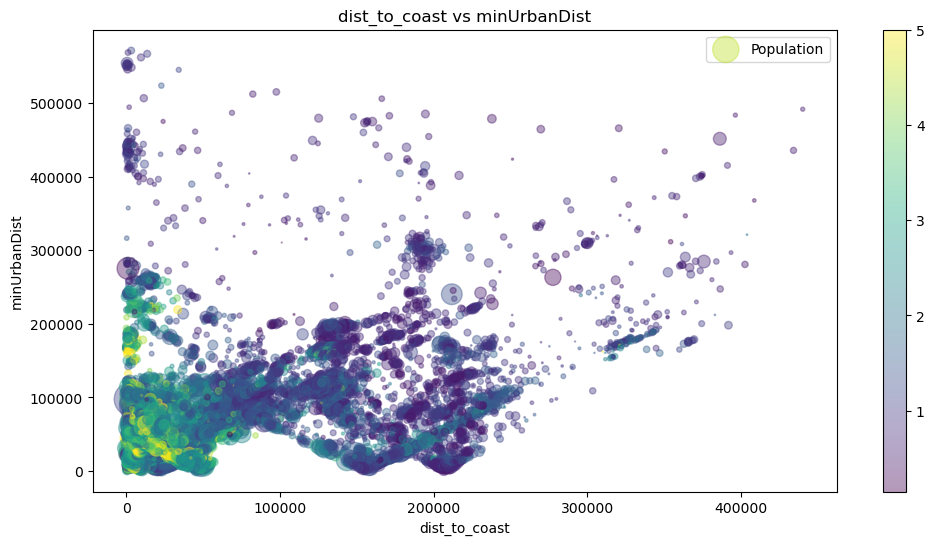

In [12]:
# Scatter plot between longitude and latitude
plt.figure(figsize=(12,6))
sc = plt.scatter(df["dist_to_coast"],
                 df["minUrbanDist"],
                 alpha=0.4,
                 cmap="viridis",
                 c=df["MedHouseVal"],
                s=df["Population"]/50,
                label='Population')
plt.colorbar(sc)
plt.xlabel("dist_to_coast")
plt.ylabel("minUrbanDist")
plt.title("dist_to_coast vs minUrbanDist")
plt.legend()
plt.show()

I created a scatter plot that shows the relationship between distance to the coast and minimum distance to an urban area, where the points are colored by median house value and sized by population.

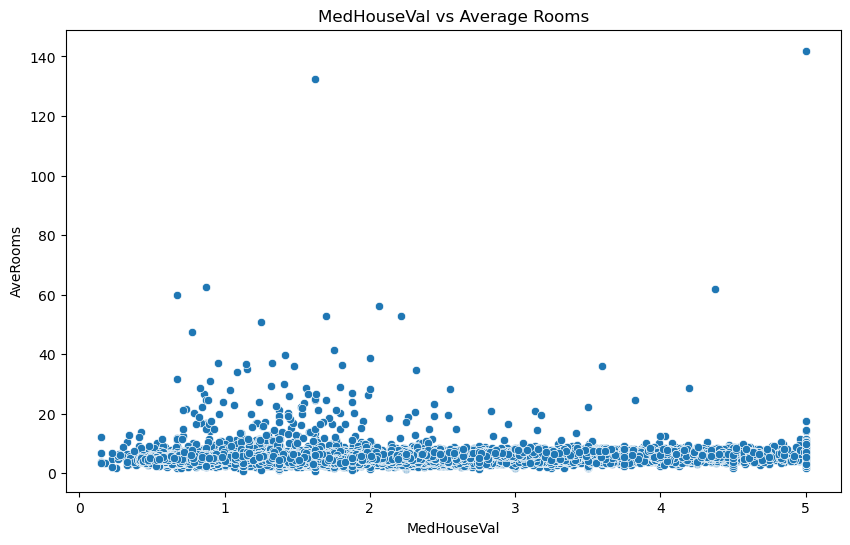

In [13]:
# Scatter plot of MedHouseVal vs AveRooms
plt.figure(figsize=(10,6))
sns.scatterplot(x='MedHouseVal', y='AveRooms', data=df)
plt.title('MedHouseVal vs Average Rooms')
plt.show()

the relationship between MedHouseVal and AveRooms

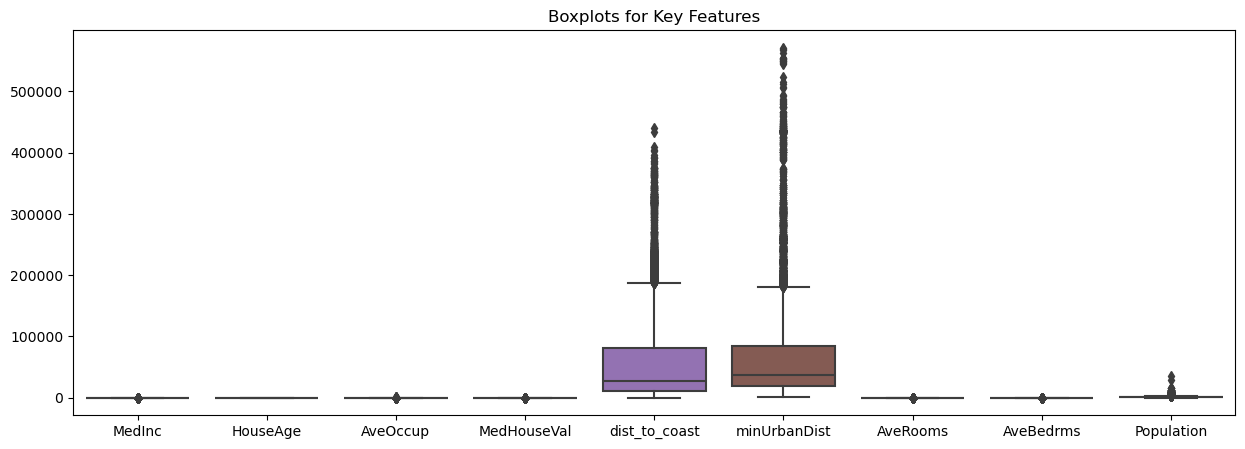

In [14]:
# Boxplots for key features
plt.figure(figsize=(15,5))
sns.boxplot(data=df[['MedInc','HouseAge','AveOccup','MedHouseVal','dist_to_coast','minUrbanDist', 'AveRooms','AveBedrms', 'Population']])
plt.title('Boxplots for Key Features')
plt.show()

In [15]:
Q1 = df['dist_to_coast'].quantile(0.25)
Q3 = df['dist_to_coast'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Lower bound: -11077.682338651966, Upper bound: 102224.41646268686


In [16]:
# Keep only rows where dist_to_coast is within the bounds
df = df[(df['dist_to_coast'] >= lower_bound) & (df['dist_to_coast'] <= upper_bound)]

In [17]:
Q1 = df['minUrbanDist'].quantile(0.25)
Q3 = df['minUrbanDist'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Lower bound: 4277.529519822723, Upper bound: 73343.30826917793


In [18]:
# Keep only rows where minUrbanDist is within the bounds
df = df[(df['minUrbanDist'] >= lower_bound) & (df['minUrbanDist'] <= upper_bound)]

In [19]:
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Lower bound: 538.1, Upper bound: 2062.9


In [20]:
# Keep only rows where minUrbanDist is within the bounds
df = df[(df['Population'] >= lower_bound) & (df['Population'] <= upper_bound)]

Here we remove the outlier from these columns because these values contains high they contain overfitting to our model therefore i remove outlier.

#Split the data for modeling 
# Decision tree

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create the model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Create custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Primary scoring metric
    refit='R2',  # Refit the best model on the complete training set using R2
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)
print("Best estimator R2 score: ", grid_search.best_estimator_.score(X_train, y_train))

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_D = best_model.predict(X_test)


# Cross-validation scores of the best model
print("\nCross-validation scores of best model:")
cv_results = cross_val_score(
    best_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)
print(f"Mean R2: {cv_results.mean():.4f}")
print(f"Std R2: {cv_results.std():.4f}")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters found:  {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 15}
Best cross-validation score (negative MSE):  -0.4124148438186593
Best estimator R2 score:  0.7409007820600504

Cross-validation scores of best model:
Mean R2: 0.6738
Std R2: 0.0190


In [25]:
# Evaluation
print("\nTest Set Performance:")
mae_D = mean_absolute_error(y_test, y_pred_D)
mse_D = mean_squared_error(y_test, y_pred_D)
r2_D = r2_score(y_test, y_pred_D)

print(f"MAE: {mae_D:.4f}")
print(f"MSE: {mse_D:.4f}")
print(f"R²: {r2_D:.4f}")


Test Set Performance:
MAE: 0.4538
MSE: 0.4050
R²: 0.6537


In [26]:
y_train_pred = best_model.predict(X_train)
r2_train_D = r2_score(y_train, y_train_pred)
print(f"Training R²: {r2_train_D:.4f}")


Training R²: 0.7409


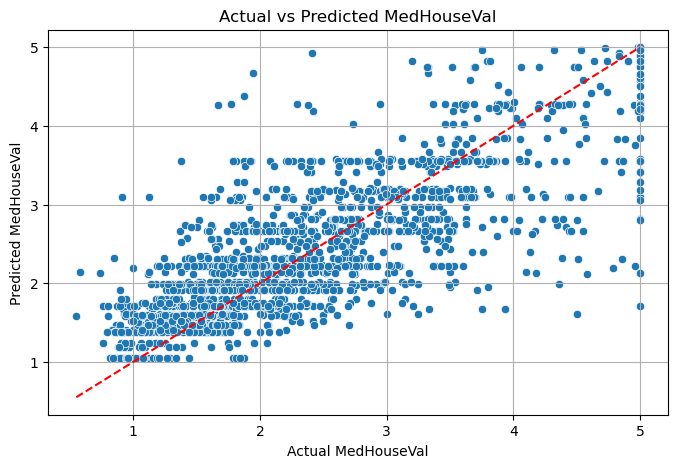

In [27]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_D)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted MedHouseVal")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

The code aimed to predict 'MedHouseVal' using other features from a dataset.The features were standardized using StandardScaler to ensure they have zero mean and unit variance.The data was split into training and testing sets to evaluate the model's performance on unseen data.

A Decision Tree Regressor model was trained with specific hyperparameters: max_depth=5, min_samples_split=10, and min_samples_leaf=4. These parameters control the complexity of the tree to prevent overfitting

What the model perform better?

The code provides the MAE, MSE, and R² values, which allow you to understand how well the model performed. Lower MAE and MSE values indicate better prediction accuracy, while a higher R² value indicates that the model explains a larger proportion of the variance in the target variable.

# knn(K nearest neighbour)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [29]:
# KNN regressor
knn = KNeighborsRegressor(n_neighbors=20)  # You can change n_neighbors to tune

# Define the scoring metric
scoring = make_scorer(mean_squared_error)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=scoring)  # 5-fold cross-validation

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Cross-Validated MSE: {mean_cv_score:.2f} ± {std_cv_score:.2f}')

# Fit the model on the entire training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_N = knn.predict(X_test)

# Evaluate the model on the test set
r2_N = r2_score(y_test, y_pred_N)
mae_N = mean_absolute_error(y_test, y_pred_N)
mse_N = mean_squared_error(y_test, y_pred_N)

print(f'R² Score: {r2_N:.2f}')
print(f'MSE: {mse_N:.2f}')
print(f'MAE: {mae_N:.2f}')

# evaluate the model on the training set
y_train_pred = knn.predict(X_train)
r2_train_N = r2_score(y_train, y_train_pred)
print(f"Training R²: {r2_train_N:.4f}")

Cross-Validated MSE: 0.35 ± 0.01
R² Score: 0.72
MSE: 0.33
MAE: 0.41
Training R²: 0.7571


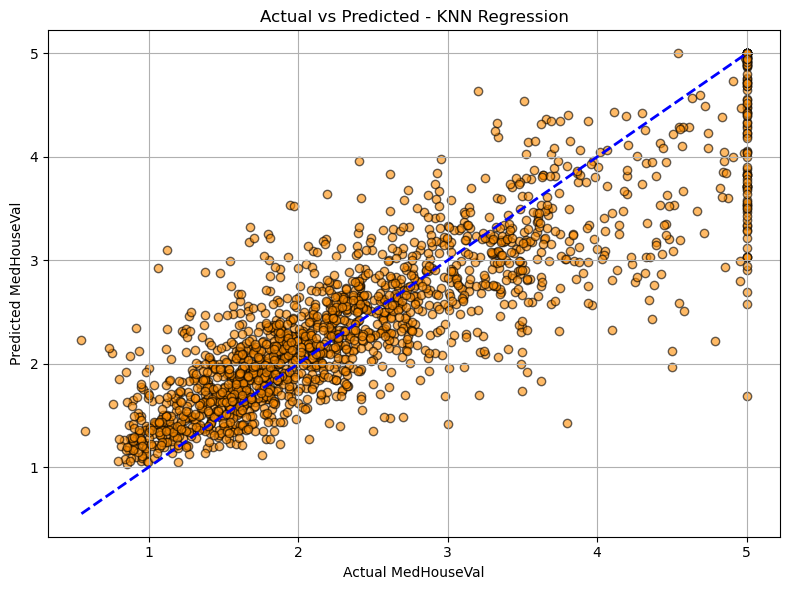

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_N, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted - KNN Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

parameter is set to 20, meaning the model will consider the 20 nearest data points to make predictions,5-fold cross-validation is performed on the training data. This splits the training data into 5 subsets, trains the model on 4, and tests it on the remaining one, repeating this 5 times. This helps to get a more robust estimate of the model's performance.

The code attempts to predict a continuous target variable using a K-Nearest Neighbors (KNN) regression model. The model's performance is evaluated using cross-validation on the training data and then on the held-out test data.

To determine if the model performed better or worse, the results of the metrics need to be compared to the results of other models that have been run on the same data set. The Lower the MSE and MAE the better, and the higher the R² the better

# SVM(Support vector machine)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

In [32]:
# Define the parameter grid to search
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],  # Different kernel types to try
    'C': [0.1, 1],  # Regularization parameter
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 0.1],  # Kernel coefficient for 'rbf' and 'poly'
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon in the epsilon-SVR model
}

# Create the SVR model
svr = SVR()

# Define scoring metrics
scoring = {
    'R2': make_scorer(r2_score),
    'Negative MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'Negative MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Primary metric to optimize
    refit=True,  # Refit the best model with the entire dataset
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Shows progress
    n_jobs=-1  # Uses all available CPU cores
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_svr = grid_search.best_estimator_

# Make predictions with the best model
y_pred_S = best_svr.predict(X_test)
# You can also view the complete cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nCross-validation results:")
print(cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score'))

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

R² Score: 0.743
MSE: 0.30
MAE: 0.38

Cross-validation results:
                                               params  mean_test_score  \
63  {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'ker...        -0.312516   
60  {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'ke...        -0.312644   
78  {'C': 1, 'epsilon': 0.2, 'gamma': 'auto', 'ker...        -0.312859   
75  {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'ke...        -0.312964   
48  {'C': 1, 'epsilon': 0.01, 'gamma': 'auto', 'ke...        -0.313419   
..                                                ...              ...   
89  {'C': 1, 'epsilon': 0.2, 'gamma': 0.1, 'kernel...       -32.276657   
50  {'C': 1, 'epsilon': 0.01, 'gamma': 'auto', 'ke...       -33.735850   
47  {'C': 1, 'epsilon': 0.01, 'gamma': 'scale', 'k...       -34.607896   
65  {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'ker...    

In [55]:
y_train_pred = best_svr.predict(X_train)

In [56]:
# Evaluate the best model
r2_S = r2_score(y_test, y_pred_S)
mae_S = mean_absolute_error(y_test, y_pred_S)
mse_S = mean_squared_error(y_test, y_pred_S)
r2_train_S = r2_score(y_train, y_train_pred)
print("\nBest Parameters:", grid_search.best_params_)
print(f"\nR² Score: {r2_S:.3f}")
print(f'MSE: {mse_S:.2f}')
print(f'MAE: {mae_S:.2f}')
print(f"Training R²: {r2_train_S:.4f}")


Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

R² Score: 0.743
MSE: 0.30
MAE: 0.38
Training R²: 0.7834


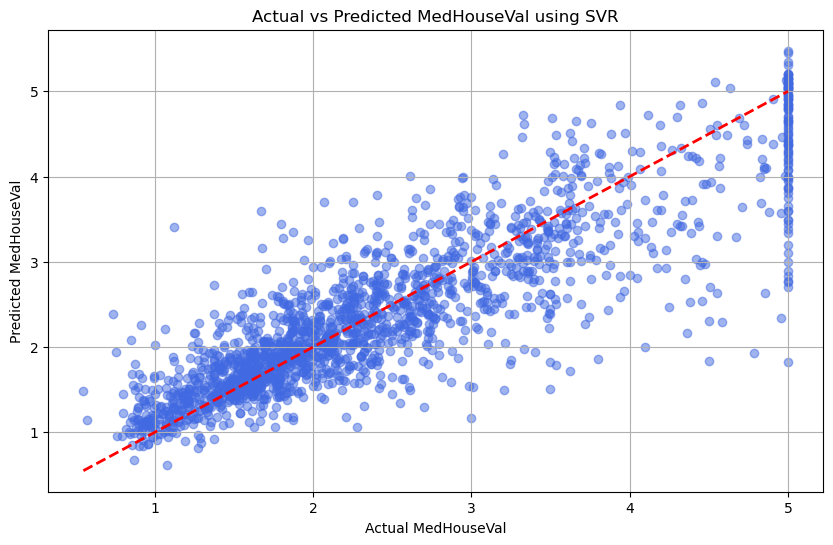

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_S, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted MedHouseVal using SVR")
plt.grid(True)
plt.show()

The code performs a grid search to optimize the parameters of a Support Vector Regression (SVR) model. It explores various combinations of kernel types (rbf, linear, poly), regularization parameter C, kernel coefficient gamma, and epsilon value. The grid search uses 5-fold cross-validation to evaluate model performance and selects the parameter combination that minimizes the negative mean squared error (MSE). The best-performing SVR model is then used to make predictions on the test data. The code also prints a detailed cross-validation result, which includes the parameter combinations, their mean test scores, standard deviations, and ranks.

# create the ensembel and compare with linear regression

In [37]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

In [39]:
ensemble_model = VotingRegressor([
    ('decision_tree', best_model),
    ('knn', knn),
    ('svr', best_svr)
])

In [40]:
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('decision_tree',
                             DecisionTreeRegressor(max_depth=7,
                                                   min_samples_leaf=6,
                                                   min_samples_split=15,
                                                   random_state=42)),
                            ('knn', KNeighborsRegressor(n_neighbors=20)),
                            ('svr', SVR(C=1, gamma='auto'))])

In [43]:
y_pred_ensemble = ensemble_model.predict(X_test)

In [44]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred):.4f}")

evaluate_model("Ensemble Model", y_test, y_pred_ensemble)


Ensemble Model Performance:
R² Score: 0.7447
RMSE: 0.2986


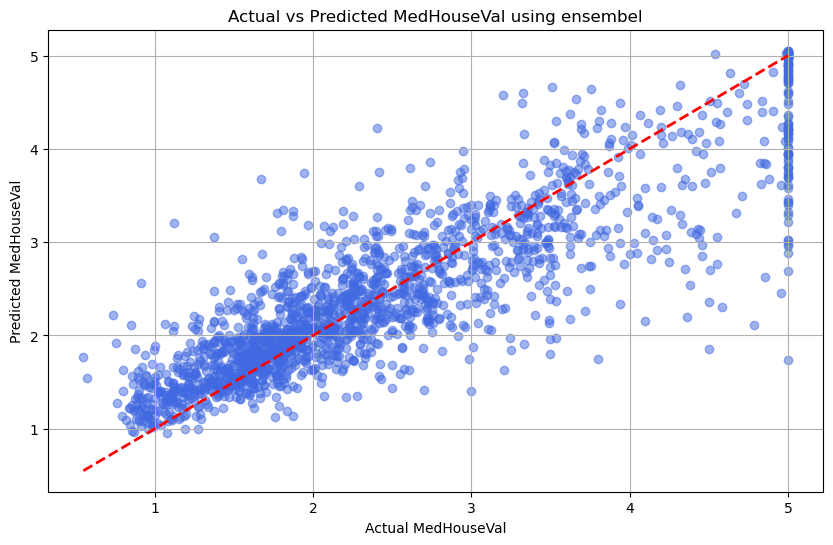

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted MedHouseVal using ensembel")
plt.grid(True)
plt.show()

The code creates an ensemble model called VotingRegressor. This model combines the predictions of multiple individual regression models to produce a final prediction,Ensemble models generally perform better than their individual components because they reduce variance and bias. By combining the strengths of multiple models, they can produce more robust and accurate predictions.

The code creates an ensemble model that combines a decision tree, KNN, and SVR. It then evaluates the ensemble model's performance using R² and RMSE. If the ensemble model has a higher R² and lower RMSE than the individual models, it is considered to have performed better.

In [41]:
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False],  # Only works with some solvers
    'copy_X': [True, False]
}

lr_model = LinearRegression()

# Create GridSearchCV object
lr_grid = GridSearchCV(estimator=lr_model,
                      param_grid=lr_params,
                      cv=5,  # 5-fold cross-validation
                      scoring='r2',  # You can change to 'neg_mean_squared_error' if preferred
                      n_jobs=-1,  # Use all available cores
                      verbose=1)

# Fit the grid search
lr_grid.fit(X_train, y_train)

# Get the best model
best_lr = lr_grid.best_estimator_

# Evaluate on test set
y_pred_lr = best_lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [42]:
print("Best Linear Regression Parameters:", lr_grid.best_params_)
print(f"Linear Regression R²: {lr_r2:.3f}")
print(f"Linear Regression MAE: {lr_mae:.3f}")
print(f"Linear Regression MSE: {lr_mse:.3f}")

Best Linear Regression Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Linear Regression R²: 0.607
Linear Regression MAE: 0.506
Linear Regression MSE: 0.459


In [46]:
y_train_pred = best_lr.predict(X_train)
r2_train_S = r2_score(y_train, y_train_pred)
print(f"Training R²: {r2_train_S:.4f}")

Training R²: 0.6088


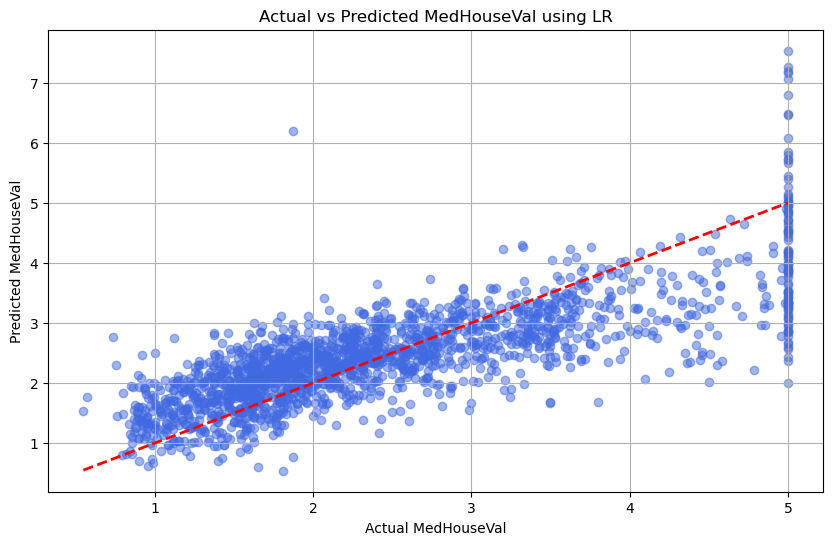

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted MedHouseVal using LR")
plt.grid(True)
plt.show()

The GridSearchCV automatically finds the combination of fit_intercept, positive, and copy_X that resulted in the highest R² score during cross-validation.
To know exactly which parameter set performed the best, you would need to look at lr_grid.best_params_. This attribute will show you the optimal parameter values found by the grid search.
The R², MAE, and MSE values that are printed at the end of the code represent the performance of this "best" linear regression model on the unseen test dataset.

# Save all result into excel

In [57]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Store results in a dictionary
results = {
    'Model': ['Decision Tree', 'KNN', 'SVR', 'Ensemble', 'Linear Regression'],
    'Prediction': [
        y_pred_D,  # Decision Tree Predictions
        y_pred_N,  # KNN Predictions
        y_pred_S,  # SVR Predictions
        y_pred_ensemble,  # Ensemble Predictions
        y_pred_lr  # Linear Regression Predictions
    ],
    'R² Score': [
        r2_D,  # Decision Tree R²
        r2_N,  # KNN R²
        r2_S,  # SVR R²
        r2_score(y_test, y_pred_ensemble),  # Ensemble R²
        r2_score(y_test, y_pred_lr)  # Linear Regression R²
    ],
    'MAE': [
        mae_D,  # Decision Tree MAE
        mean_absolute_error(y_test, y_pred_N),  # KNN MAE
        mean_absolute_error(y_test, y_pred_S),  # SVR MAE
        mean_absolute_error(y_test, y_pred_ensemble),  # Ensemble MAE
        mean_absolute_error(y_test, y_pred_lr)  # Linear Regression MAE
    ],
    'MSE': [
        mse_D,  # Decision Tree MSE
        mean_squared_error(y_test, y_pred_N),  # KNN MSE
        mean_squared_error(y_test, y_pred_S),  # SVR MSE
        mean_squared_error(y_test, y_pred_ensemble),  # Ensemble MSE
        mean_squared_error(y_test, y_pred_lr)  # Linear Regression MSE
    ],
    'Training R²': [
        r2_train_D,  # Decision Tree Training R²
        r2_train_N,  # KNN Training R²
        r2_train_S,  # SVR Training R²
        r2_score(y_train, ensemble_model.predict(X_train)),  # Ensemble Training R²
        r2_score(y_train, best_lr.predict(X_train))  # Linear Regression Training R²
    ]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Save results to an Excel file
df_results.to_excel('model_performance_results.xlsx', index=False)

print("Results saved to 'model_performance_results.xlsx'")


Results saved to 'model_performance_results.xlsx'


Here above code autmatically  save all results into excel.

In [58]:
df_results

,Model,Prediction,R² Score,MAE,MSE,Training R²
0,Decision Tree,"[1.5967938931297705, 2.974472727272727, 1.1890...",0.653728,0.453833,0.404989,0.740901
1,KNN,"[2.0139000000000005, 2.03415, 1.4907, 2.568700...",0.722102,0.407297,0.325020,0.757089
2,SVR,"[1.9643493368865255, 2.1099253877452635, 1.132...",0.743286,0.380798,0.300244,0.783365
3,Ensemble,"[1.8583477433387656, 2.3728493716726633, 1.270...",0.744660,0.385134,0.298637,0.790379
4,Linear Regression,"[2.365405476879949, 2.4353641041560943, 1.4347...",0.607239,0.505674,0.459360,0.608832


**Thank you!!**